<a href="https://colab.research.google.com/github/melypadillareyes15-cell/Assignments/blob/main/Final%20Project/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ARTIFICIAL INTELLIGENCE FINAL PROJECT**
---

# **Teams Details**

**Team Members:**
*   Melissa Montserrat Padilla Reyes (2043294)
*   Marcelo Carranco Valladares (2013534)

**Career:** Biomedical Engineering

**Group:** 002

**Class:** Artificial Inteligence

**Professor:** Daniel Isaías López Páez




**Import dataset**

The dataset link consist of several COVID-19 chest X-rays. The dataset can be viewed here: [COVID-19 Dataset](https://www.kaggle.com/datasets/tawsifurrahman/covid19-radiography-database/data)

In [ ]:
!kaggle datasets download -d tawsifurrahman/covid19-radiography-database
!unzip covid19-radiography-database.zip

Se truncaron las últimas líneas 5000 del resultado de transmisión.
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7921.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7922.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7923.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7924.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7925.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7926.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7927.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7928.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7929.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-793.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7930.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7931.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Nor

**Import Libraries**

In [ ]:
# Import Libraries

import cv2
import os, glob

import numpy as np
import seaborn as sns
from imutils import paths
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Dense, Flatten, AveragePooling2D, Dropout, BatchNormalization, Conv2D

In [ ]:
# Define several parameters for CNN model and training, these can be modified

EPOCHS = 20
BATCH_SIZE = 32
COVID_LEN = 218
INP_SIZE = (224,224,3)

**Data Preprocessing**

In [ ]:
# Data creation and preprocessing

def create_data(dir_name):
    temp_data = []
    img_list = glob.glob('../' + dir_name + '/*')
    for img in img_list[:COVID_LEN]:
        image = cv2.imread(img)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (224, 224))
        temp_data.append(image)
    return temp_data

data = []
labels = []

covid_dir = '/content/COVID-19_Radiography_Dataset/COVID/images'
normal_dir = '/content/COVID-19_Radiography_Dataset/Lung_Opacity/images'
pneumonia_dir = '/content/COVID-19_Radiography_Dataset/Normal/images'

data.extend(create_data(covid_dir))
data.extend(create_data(normal_dir))
data.extend(create_data(pneumonia_dir))

labels.extend([1] * COVID_LEN)
labels.extend([0]*2*COVID_LEN)

data = np.array(data)/255.0
labels = np.array(labels)

print(data.shape)
print(labels.shape)

(654, 224, 224, 3)
(654,)


**Model Selection and training**

In [ ]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

(x_train, x_test, y_train, y_test) = train_test_split(
    data,
    labels,
    test_size=0.20,
    stratify=labels,
    random_state=42
)
trainAug = ImageDataGenerator(
    rotation_range=15,
    fill_mode="nearest"
)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(523, 224, 224, 3)
(523, 2)
(131, 224, 224, 3)
(131, 2)


In [ ]:
model = Sequential()
model.add(BatchNormalization(input_shape=INP_SIZE))
model.add(Conv2D(16, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(16, kernel_size=(3,3), padding='same', activation='relu'))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(Dropout(0.35))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.35))
model.add(Dense(2, activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit_generator(
          trainAug.flow(x_train, y_train, batch_size = BATCH_SIZE),
          steps_per_epoch = len(x_train) // BATCH_SIZE,
          validation_data = (x_test, y_test),
          validation_steps = len(x_test) // BATCH_SIZE,
          epochs = EPOCHS
          )

<ipython-input-31-882ebd5384ca>:14: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/20
16/16 [==============================] - 62s 3s/step - loss: 5.9297 - accuracy: 0.5560 - val_loss: 0.6936 - val_accuracy: 0.4656
Epoch 2/20
16/16 [==============================] - 56s 4s/step - loss: 0.7354 - accuracy: 0.6619 - val_loss: 0.6890 - val_accuracy: 0.6641
Epoch 3/20
16/16 [==============================] - 55s 3s/step - loss: 0.6050 - accuracy: 0.6640 - val_loss: 0.6868 - val_accuracy: 0.6641
Epoch 4/20
16/16 [==============================] - 53s 3s/step - loss: 0.6068 - accuracy: 0.6619 - val_loss: 0.6751 - val_accuracy: 0.6641
Epoch 5/20
16/16 [==============================] - 56s 3s/step - loss: 0.6009 - accuracy: 0.6721 - val_loss: 0.6668 - val_accuracy: 0.6718
Epoch 6/20
16/16 [==============================] - 54s 3s/step - loss: 0.5699 - accuracy: 0.6823 - val_loss: 0.6380 - val_accuracy: 0.7023
Epoch 7/20
16/16 [==============================] - 52s 3s/step - loss: 0.5655 - accuracy: 0.7047 - val_loss: 0.6377 - val_accuracy: 0.7099
Epoch 8/20
16/16 [==

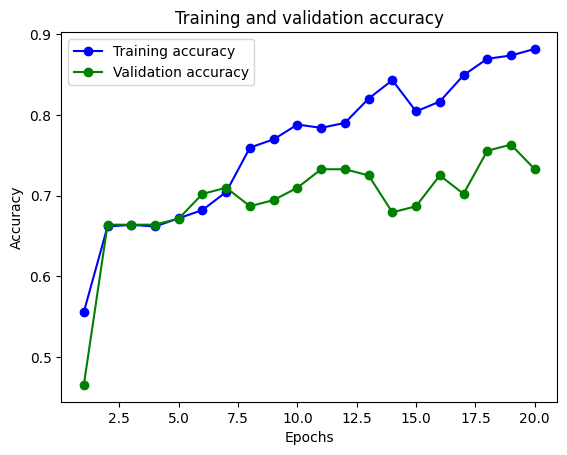

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plotting the accuracy and validation accuracy
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo-', label='Training accuracy')
plt.plot(epochs, val_acc, 'go-', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

**Model Testing**

1/1 [==============================] - 0s 231ms/step


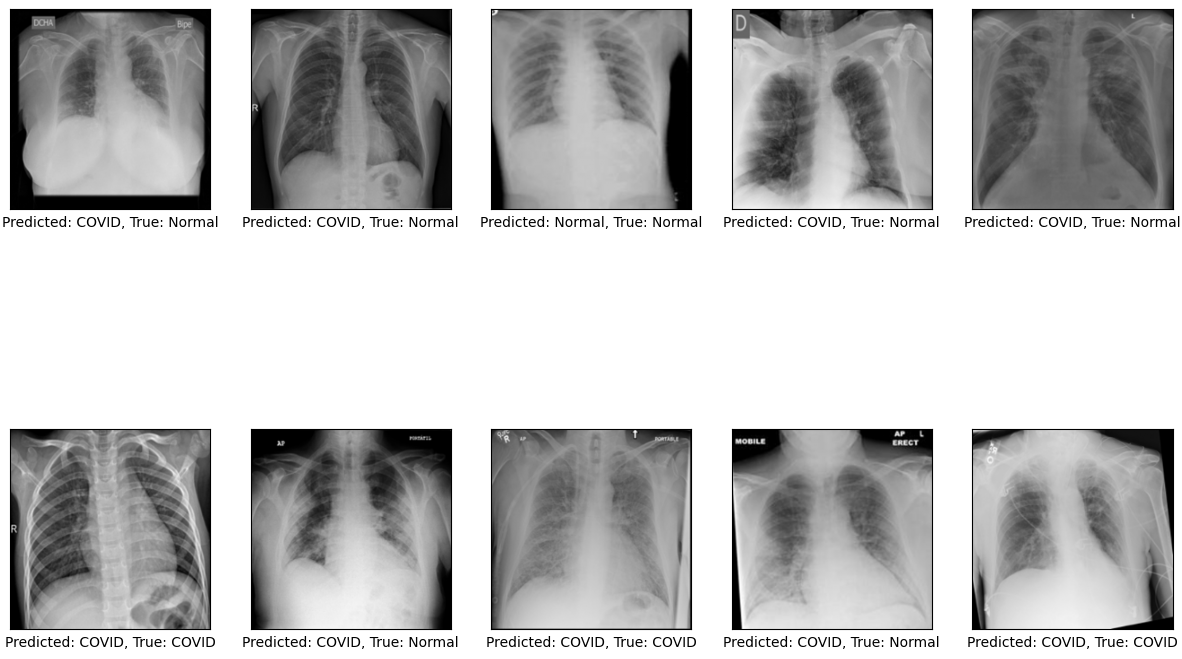

In [ ]:
# Predict on a subset of test data
num_images = 10
test_subset = x_test[:num_images]
true_labels = np.argmax(y_test[:num_images], axis=1)

# Make predictions
predictions = model.predict(test_subset)
predicted_classes = np.argmax(predictions, axis=1)

# Label mapping
label_map = {0: 'COVID', 1: 'Normal'}
true_labels_str = [label_map[label] for label in true_labels]
predicted_classes_str = [label_map[label] for label in predicted_classes]

# Plotting the first 10 test images with their predicted and true labels
plt.figure(figsize=(15, 10))
for i in range(num_images):
    plt.subplot(2, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_subset[i], cmap=plt.cm.binary)  # Assuming images are grayscale, change if necessary
    plt.xlabel(f"Predicted: {predicted_classes_str[i]}, True: {true_labels_str[i]}")
plt.show()